In [1]:
# import pandas as pd
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd 

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading data from csv files
trainDS=pd.read_csv("train.csv")
testDS=pd.read_csv("test.csv")

print("train dataset :", str(trainDS.shape))
print("test dataset :" ,str(testDS.shape))

trainDS

train dataset : (891, 12)
test dataset : (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#dataset exploring

#1 check if ID is unique
if (trainDS.PassengerId.nunique()==trainDS.shape[0]):
    print("ID is unique")
else:
    print ("ID is duplicated")

#2 check if train and test sets are detinct
if (len(np.intersect1d(trainDS.PassengerId.values, testDS.PassengerId.values))== 0):
    print("Train and test sets are distinct")
else:
    print("Train and test sets arn`t distinct")
    
#3 check if dataset hasNan
isContainsNull=trainDS.isnull().values.any()
if(isContainsNull):
    print("These columns contains nan")
    print(trainDS.columns[trainDS.isnull().any()].tolist())
else:
    print("ur Dataset dosen`t contain nan")
    
#print Column type information
col_DataTypes=trainDS.dtypes.reset_index()
col_DataTypes

ID is unique
Train and test sets are distinct
These columns contains nan
['Age', 'Cabin', 'Embarked']


,index,0
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [4]:
#Analyzing the data

#Check for missing data & list them 
if(isContainsNull):
    nas=pd.concat([trainDS.isnull().sum(),testDS.isnull().sum()],axis=1,keys=['Train Dataset', 'Test Dataset'])
    print("Nan in the dataset")
    print(nas[nas.sum(axis=1)>0])
    print("\n \n")


Nan in the dataset
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0

 



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


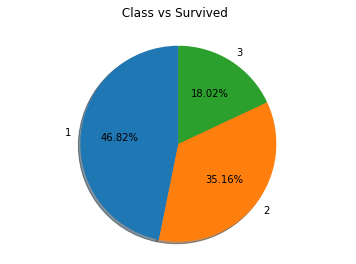

In [5]:
# Class vs Survived
pClassSurv=trainDS[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
print(pClassSurv)
#plotting :D
labels = pClassSurv.Pclass
sizes = pClassSurv.Survived

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.suptitle(' Class vs Survived')
plt.show()

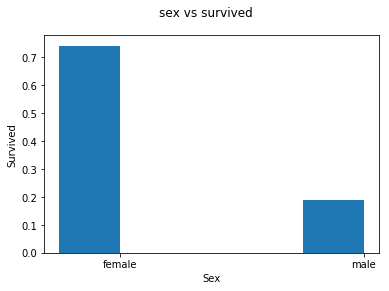

In [6]:
#sex vs survived
sexSurv=trainDS[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sexSurv

fig = plt.figure()

plt.xlabel('Sex')
plt.ylabel('Survived')

width = .25
ind = np.arange(len(sexSurv.Survived))
plt.bar(ind, sexSurv.Survived, width=width)
plt.xticks(ind +width/2, sexSurv.Sex)
fig.suptitle("sex vs survived")
plt.show()

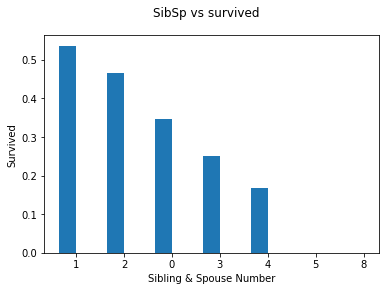

In [7]:
# SibSp vs Survived
sibSurv=trainDS[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


#plotting :D

fig = plt.figure()

plt.xlabel('Sibling & Spouse Number')
plt.ylabel('Survived')
width = .35
ind = np.arange(len(sibSurv.Survived)) # X-axis
plt.bar(ind, sibSurv.Survived, width=width)
plt.xticks(ind +width/2, sibSurv.SibSp)
fig.suptitle("SibSp vs survived")
plt.show()

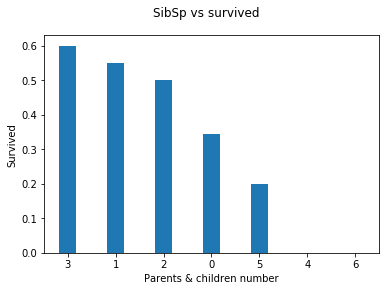

In [8]:
# ParCh vs Survived //parent and children
parchSurv=trainDS[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#plotting :D

fig = plt.figure()

plt.xlabel('Parents & children number')
plt.ylabel('Survived')

width = .35
ind = np.arange(len(parchSurv.Survived)) # X-axis
plt.bar(ind, parchSurv.Survived, width=width)
plt.xticks(ind , parchSurv.Parch) #Y-axis
fig.suptitle("SibSp vs survived")
plt.show()



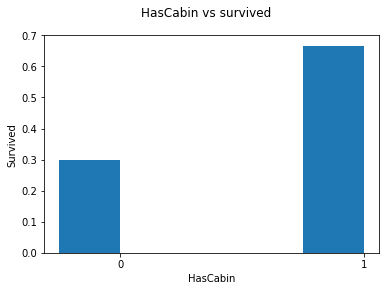

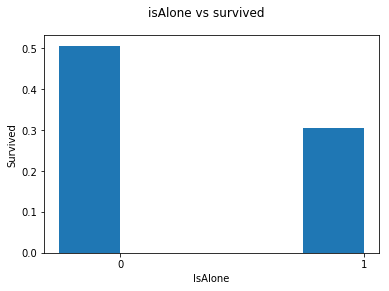

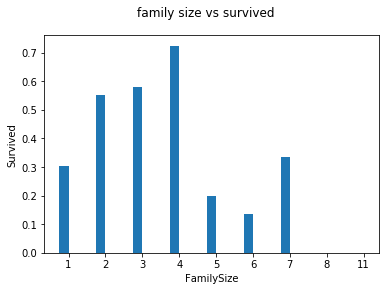

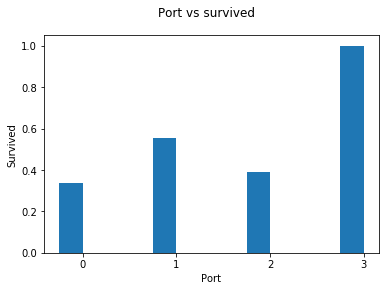

In [9]:
#cleaning data
#completing :
#manage Age
trainMeans=trainDS.groupby('Sex')['Age'].mean()
trainMeanAge=int(np.mean(trainMeans))
trainDS.Age=trainDS.Age.fillna(value=trainMeanAge)

testMeans=testDS.groupby('Sex')['Age'].mean()
testMeanAge=int(np.mean(testMeans))
testDS.Age.fillna(value=testMeanAge, inplace=True)

# Embarked 
trainDS.Embarked.fillna('P', inplace=True)
testDS.Embarked.fillna('P', inplace=True)
trainDS['Port'] = trainDS.Embarked.map( {'S': 0, 'C': 1, 'Q': 2, 'P': 3} ).astype(int)
testDS['Port'] = testDS.Embarked.map({'S': 0, 'C': 1, 'Q': 2, 'P': 3}).astype(int)

#Fare
testDS.Fare.fillna(testDS.Fare.median(), inplace=True)




# Feature that tells whether a passenger had a cabin on the Titanic

trainDS['HasCabin'] = trainDS["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
testDS['HasCabin'] = testDS["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

#MeanFare=trainDS.Fare.mean()
#print(MeanFare)
#trainDS['HasCabin'] =trainDS["Fare"].apply(lambda x: 0 if x <MeanFare else 1)
#testDS['HasCabin'] =trainDS["Fare"].apply(lambda x: 0 if x <MeanFare else 1)

for sample in trainDS,testDS:
    sample['FamilySize'] = sample['SibSp'] + sample['Parch'] + 1
    
for sample in trainDS,testDS:
    sample['IsAlone'] = 0
    sample.loc[sample['FamilySize'] == 1, 'IsAlone'] = 1
        

#HasCabin vs survived
cabinSurv=trainDS[['HasCabin', 'Survived']].groupby(['HasCabin'], as_index=False).mean()

fig = plt.figure()

plt.xlabel('HasCabin')
plt.ylabel('Survived')

width = .25
ind = np.arange(len(cabinSurv.Survived))
plt.bar(ind, cabinSurv.Survived, width=width)
plt.xticks(ind +width/2, cabinSurv.HasCabin)
fig.suptitle("HasCabin vs survived")
plt.show()


#isAlone vs survived
alnSurv=trainDS[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

fig = plt.figure()

plt.xlabel('IsAlone')
plt.ylabel('Survived')

width = .25
ind = np.arange(len(alnSurv.Survived))
plt.bar(ind, alnSurv.Survived, width=width)
plt.xticks(ind +width/2, alnSurv.IsAlone)
fig.suptitle("isAlone vs survived")
plt.show()

#FamilySize vs survived
fmlySurv=trainDS[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

fig = plt.figure()

plt.xlabel('FamilySize')
plt.ylabel('Survived')

width = .25
ind = np.arange(len(fmlySurv.Survived))
plt.bar(ind, fmlySurv.Survived, width=width)
plt.xticks(ind +width/2, fmlySurv.FamilySize)
fig.suptitle("family size vs survived")
plt.show()

#Port vs survived
portSurv=trainDS[['Port', 'Survived']].groupby(['Port'], as_index=False).mean()

fig = plt.figure()

plt.xlabel('Port')
plt.ylabel('Survived')

width = .25
ind = np.arange(len(portSurv.Survived))
plt.bar(ind, portSurv.Survived, width=width)
plt.xticks(ind +width/2, portSurv.Port)
fig.suptitle("Port vs survived")
plt.show()


In [10]:
#replace sex by person 
def get_person(passenger):
    age,sex = passenger
    #return sex
    if(age <16):
        return 'child'
    if(age >60):
        return 'Elderly'
    else:
        return sex 
  
    
trainDS['Person'] = trainDS[['Age','Sex']].apply(get_person,axis=1)
testDS['Person']    = trainDS[['Age','Sex']].apply(get_person,axis=1)

for sample in trainDS,testDS:                                                        #mapping genders to numirical classes
    sample['Person'] = sample['Person'].map( {'female': 0, 'male': 1,'child': 2,'Elderly': 3} ).astype(int)
   
    #convert Age to discrete classes
for sample in trainDS,testDS:    
    sample.loc[ sample['Age'] <= 18, 'Age'] = 0
    sample.loc[(sample['Age'] > 18) & (sample['Age'] <= 30), 'Age'] = 1
    sample.loc[(sample['Age'] > 30) & (sample['Age'] <= 40), 'Age'] = 2
    sample.loc[(sample['Age'] > 40) & (sample['Age'] <= 50), 'Age'] = 3
    sample.loc[(sample['Age'] > 50) & (sample['Age'] <= 60), 'Age'] = 4
    sample.loc[ sample['Age'] > 60, 'Age'] = 5
    sample['Age'] = sample['Age'].astype(int)

    #convert fare to discrete classes
for sample in trainDS,testDS:  
    sample.loc[ sample['Fare'] <= 7.91, 'Fare'] = 0
    sample.loc[(sample['Fare'] > 7.91) & (sample['Fare'] <= 14.454), 'Fare'] = 1
    sample.loc[(sample['Fare'] > 14.454) & (sample['Fare'] <= 31), 'Fare']   = 2
    sample.loc[ sample['Fare'] > 31, 'Fare'] = 3
    sample['Fare'] = sample['Fare'].astype(int)




In [11]:
#drop unused columns
del trainDS['Name'],testDS['Name']
del trainDS['Ticket'],testDS['Ticket']
del trainDS['Cabin'],testDS['Cabin']
del trainDS['Sex'],testDS['Sex']
#del trainDS['FamilySize'],testDS['FamilySize']
del trainDS['Parch'],testDS['Parch']
del trainDS['SibSp'],testDS['SibSp']
del trainDS['Embarked'],testDS['Embarked']
del trainDS['PassengerId'] #don`t delete 'PassengerId' column in test set , I will drop it later

In [12]:
# define training and testing sets

X_train = trainDS.drop("Survived",axis=1)
Y_train = trainDS["Survived"]
X_test  = testDS.drop("PassengerId",axis=1).copy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(891, 8)
(891,)
(418, 8)


In [13]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

randomForestScore=random_forest.score(X_train, Y_train)
randomForestScore

0.90011223344556679

In [14]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

LogisticRegScore=logreg.score(X_train, Y_train)
LogisticRegScore

0.73063973063973064

In [15]:
#SVM

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
SVMscore=svc.score(X_train,Y_train)
SVMscore

0.82267115600448937

In [16]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

KNNscore=knn.score(X_train, Y_train)
KNNscore

0.85185185185185186

In [17]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest'],
    'Score': [SVMscore,KNNscore,LogisticRegScore,randomForestScore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.900112
1,KNN,0.851852
0,Support Vector Machines,0.822671
2,Logistic Regression,0.730640


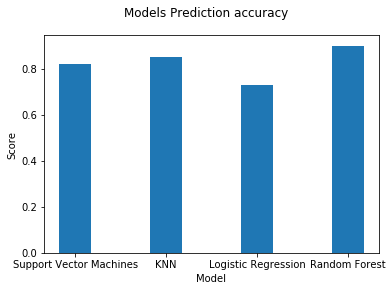

In [18]:

fig = plt.figure()

plt.xlabel('Model')
plt.ylabel('Score')

width = .35
ind = np.arange(len(models['Score']))
plt.bar(ind, models['Score'], width=width)
plt.xticks(ind , models['Model'])
fig.suptitle("Models Prediction accuracy")
plt.show()